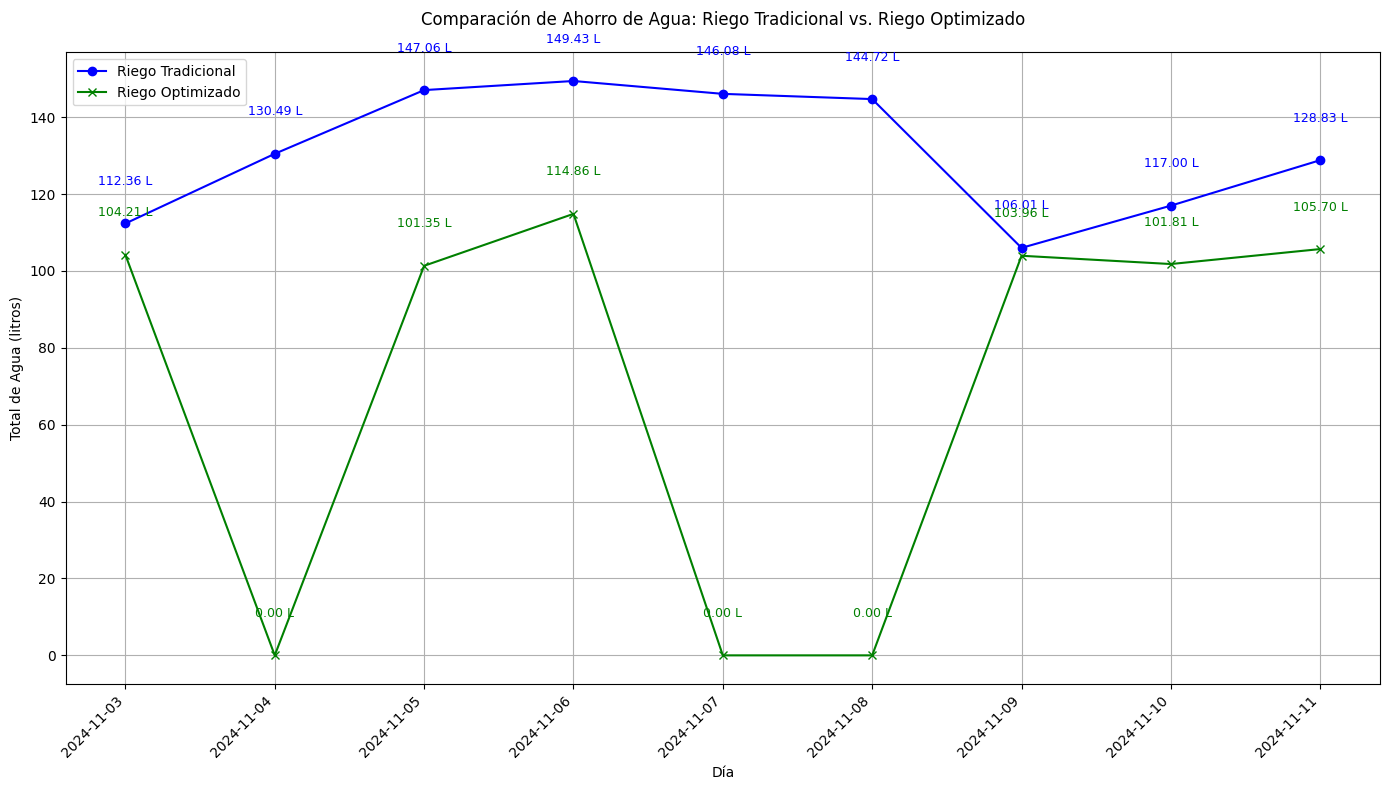

Ahorro total de agua durante los 5 días: 550.11 litros
Ahorro total de agua durante los 30 días: 3300.65 litros
Ahorro total de agua durante los 150 días: 16503.27 litros
Ahorro total de agua durante los 365 días: 40157.96 litros
Ahorro total de agua durante los 365 días x 200 plantas: 80315.92 litros


In [23]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros
plants = 100  # Número de plantas
soil_humidity_optimal_min = 50  # Límite inferior de humedad óptima

# Cargar datos de humedad del suelo desde el CSV
csv_path = "csv/device_id_1_2024-11-03_2024-11-15.csv"  # Ruta al archivo CSV
df = pd.read_csv(csv_path)

# Asegurarnos de que la columna de fecha sea de tipo datetime
df['hour'] = pd.to_datetime(df['hour'])  # Convertir la columna 'hour' a tipo datetime
df['hour'] = df['hour'].dt.tz_localize(None)  # Eliminar la zona horaria
df = df[['hour', 'avg_soil_humidity']]  # Mantener solo las columnas necesarias
df = df.rename(columns={'hour': 'Date', 'avg_soil_humidity': 'Soil_Humidity'})  # Renombrar para mayor claridad

# Función para el riego tradicional
def traditional_irrigation(day):
    water_per_plant = random.uniform(1, 1.5)  # Entre 1 y 1.5 litros por planta
    day_number = day.dayofyear  # Extraemos el número del día del año
    if day_number % 3 == 0:  # Cada 3 días, hay sobre-riego
        overwatering_factor = random.uniform(1.1, 1.15)  # 10-15% de sobre-riego
        water_per_plant *= overwatering_factor
    total_water = plants * water_per_plant
    return total_water

# Función para el riego optimizado
def optimized_irrigation(soil_humidity):
    if soil_humidity < soil_humidity_optimal_min:  # Solo se riega si la humedad está por debajo de 50%
        water_per_plant = random.uniform(1, 1.2)  # Más agua si la humedad es baja
        total_water = plants * water_per_plant
        return total_water
    return 0  # Si la humedad está dentro del rango, no se riega

# Simulación de riego para los 5 días disponibles
data = []

# Recorrer los días en los datos disponibles
for day in df['Date'].dt.date.unique():  # Usar solo días únicos
    day_data = df[df['Date'].dt.date == day].iloc[0]  # Tomar la primera fila del día
    soil_humidity = day_data['Soil_Humidity']  # Humedad real del suelo para este día
    
    # Solo calcular el riego tradicional para el primer dato del día
    traditional_water = traditional_irrigation(day_data['Date'])
    
    # Calcular el riego optimizado para todo el día
    optimized_water = optimized_irrigation(soil_humidity)
    
    data.append({
        "Date": day_data['Date'],
        "Soil_Humidity": soil_humidity,
        "Water_Traditional": traditional_water,
        "Water_Optimized": optimized_water
    })

# Convertir a DataFrame
df_comparison = pd.DataFrame(data)

# Agrupar por día (en este caso, solo tenemos 5 días)
df_comparison['Day'] = df_comparison['Date'].dt.date
daily_comparison = df_comparison.groupby('Day').agg({
    'Water_Traditional': 'sum',
    'Water_Optimized': 'sum'
}).reset_index()

# Graficar la comparación de agua con diferencia en días
plt.figure(figsize=(14, 8))

# Graficar las líneas de riego tradicional y optimizado
plt.plot(daily_comparison['Day'].astype(str), daily_comparison['Water_Traditional'], label="Riego Tradicional", color="blue", marker='o', linestyle='-', markersize=6)
plt.plot(daily_comparison['Day'].astype(str), daily_comparison['Water_Optimized'], label="Riego Optimizado", color="green", marker='x', linestyle='-', markersize=6)

# Añadir leyenda con los litros consumidos de forma ordenada
for i, row in daily_comparison.iterrows():
    # Colocar los textos de los litros cerca de las líneas
    plt.text(row['Day'].strftime('%Y-%m-%d'), row['Water_Traditional'] + 10, f"{row['Water_Traditional']:.2f} L", ha='center', color="blue", fontsize=9)
    plt.text(row['Day'].strftime('%Y-%m-%d'), row['Water_Optimized'] + 10, f"{row['Water_Optimized']:.2f} L", ha='center', color="green", fontsize=9)

# Título y etiquetas
plt.title("Comparación de Ahorro de Agua: Riego Tradicional vs. Riego Optimizado", pad=20)  # Ajustar espacio entre título y gráfico
plt.xlabel("Día")
plt.ylabel("Total de Agua (litros)")

# Leyenda
plt.legend(loc='upper left')

# Mejorar visualización de las fechas en el eje X
plt.xticks(rotation=45, ha='right')

# Ajuste de espacio
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Calcular ahorro total de agua
total_traditional_water = daily_comparison["Water_Traditional"].sum()
total_optimized_water = daily_comparison["Water_Optimized"].sum()
savings = total_traditional_water - total_optimized_water

# Extrapolar ahorro de agua para otros períodos
savings_30_days = savings * (30 / 5)
savings_150_days = savings * (150 / 5)
savings_365_days = savings * (365 / 5)
savings_365_days_2lands = (savings * (365 / 5) *2)

print(f"Ahorro total de agua durante los 5 días: {savings:.2f} litros")
print(f"Ahorro total de agua durante los 30 días: {savings_30_days:.2f} litros")
print(f"Ahorro total de agua durante los 150 días: {savings_150_days:.2f} litros")
print(f"Ahorro total de agua durante los 365 días: {savings_365_days:.2f} litros")
print(f"Ahorro total de agua durante los 365 días x 200 plantas: {savings_365_days_2lands:.2f} litros")
